## Multiple Linear Regression - BoomBikes Assignment


In [1]:
#Import Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
# Read dataset
bikes = pd.read_csv(r'C:\Users\I552991\Downloads\day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the shape of the dataset
bikes.shape

(730, 16)

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Remove Date, Instant, Casual and Registered users as these are not redundent 
bikes.drop(['dteday'], axis = 1, inplace = True)
bikes.drop(['casual'], axis = 1, inplace = True)
bikes.drop(['registered'], axis = 1, inplace = True)
bikes.drop(['instant'], axis = 1, inplace = True)

In [6]:
# Replace values which are in numbers to meaningful values
bikes['season']=bikes.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
bikes['mnth']=bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weathersit']=bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikes['weekday']=bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

## Step 2: Visualising the Data





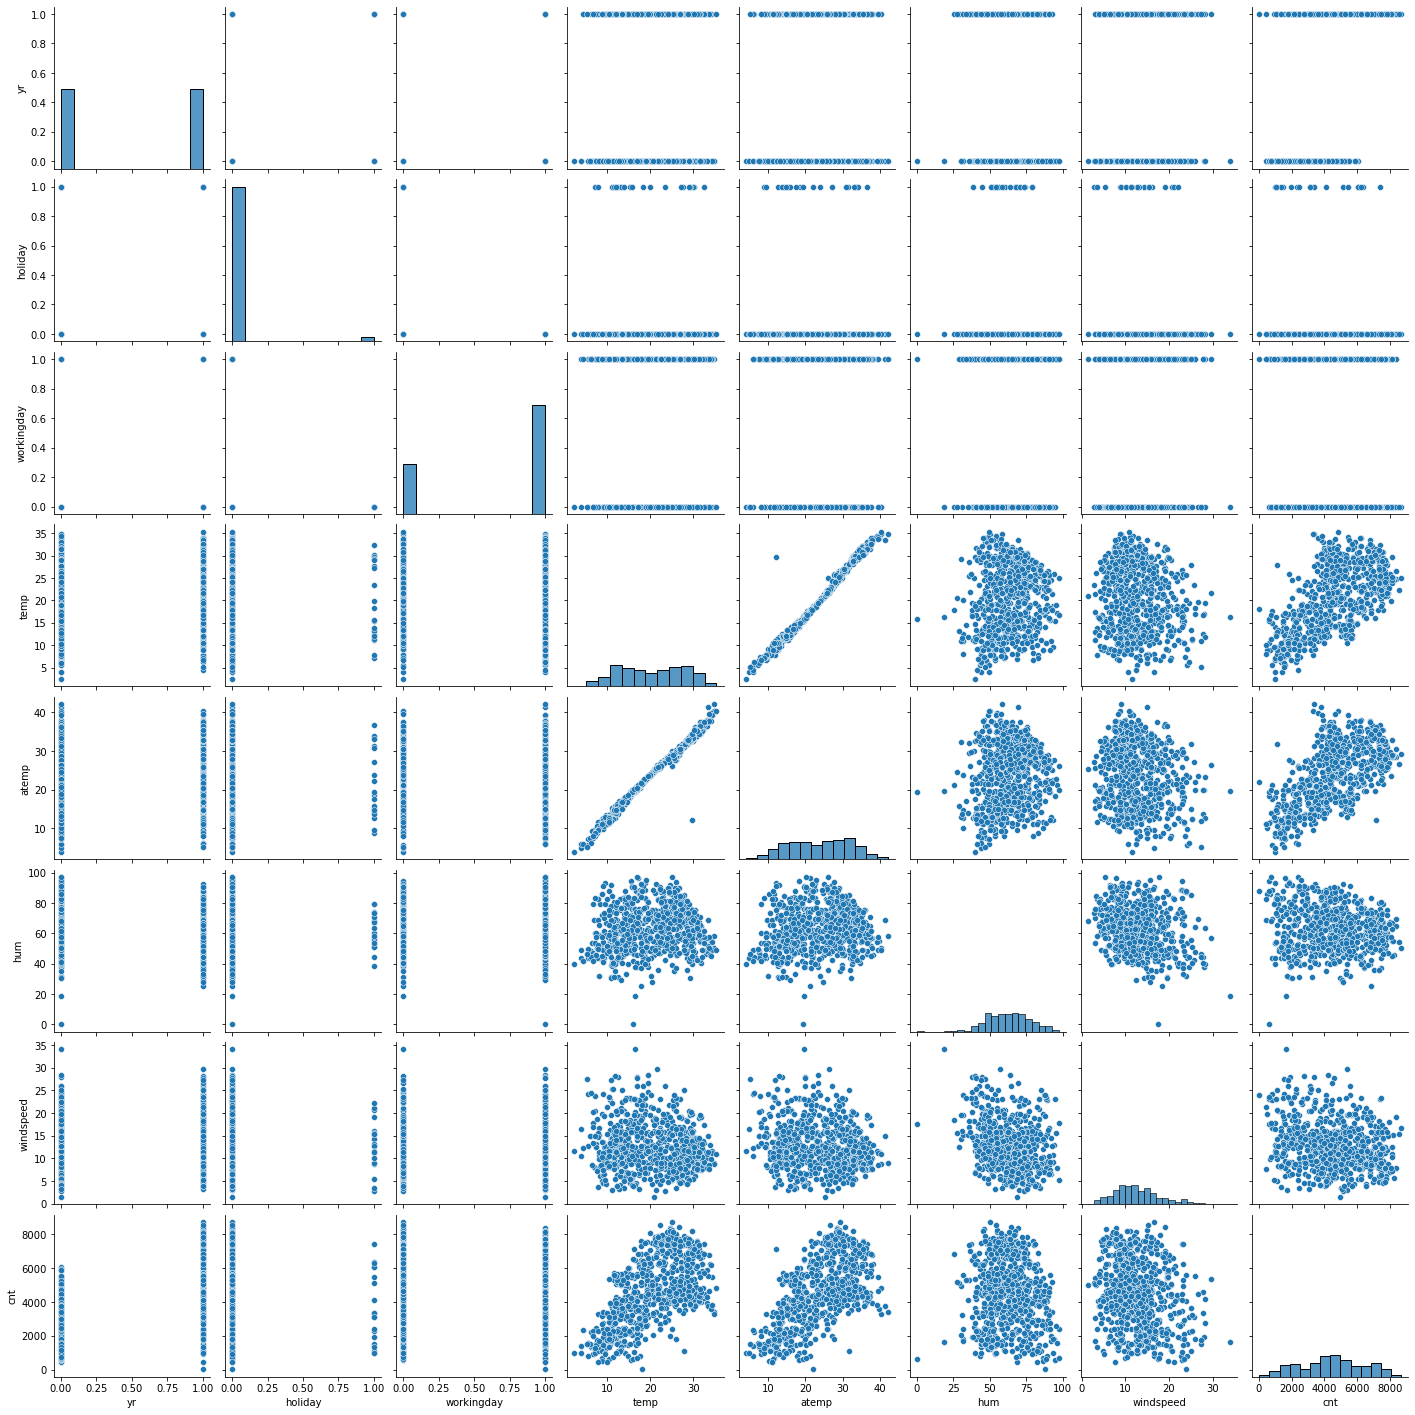

In [7]:
sns.pairplot(bikes)
plt.show()

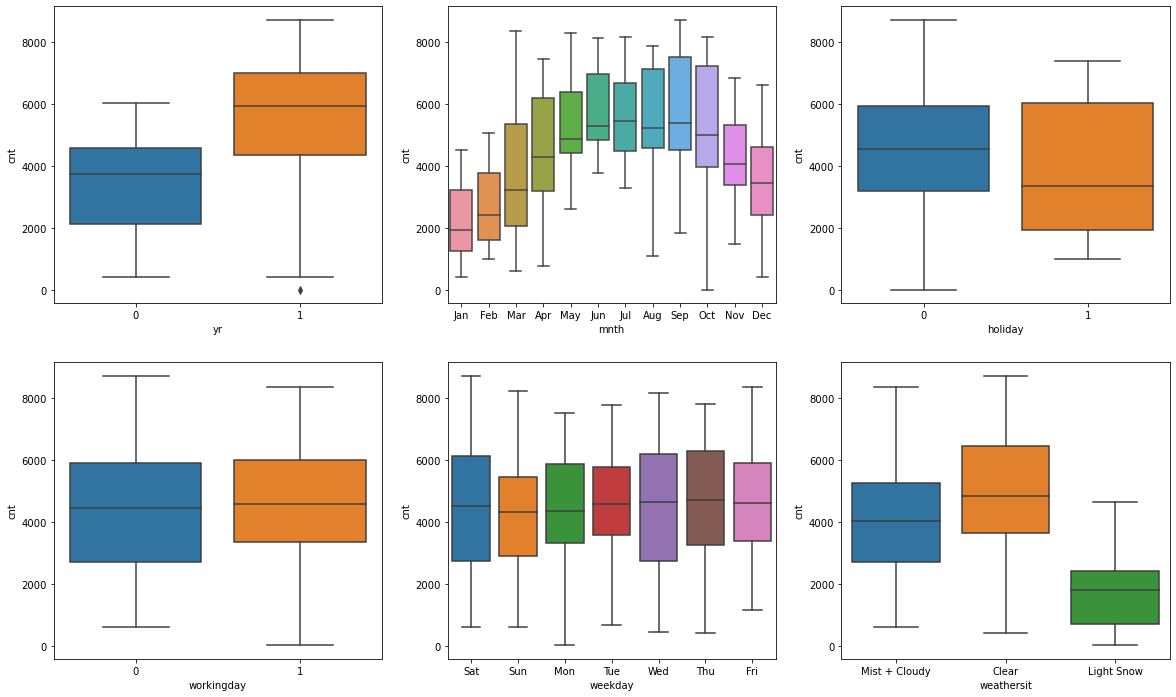

In [8]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

## Step 3: Creating Dummy Variables

In [9]:
# Season
season = pd.get_dummies(bikes['season'], drop_first = True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [10]:
bikes = pd.concat([bikes, season], axis = 1)
bikes.drop(['season'], axis = 1, inplace = True)

In [11]:
# Month
month = pd.get_dummies(bikes['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [12]:
bikes = pd.concat([bikes, month], axis = 1)
bikes.drop(['mnth'], axis = 1, inplace = True)

In [13]:
# Weather
weather = pd.get_dummies(bikes['weathersit'], drop_first = True)
weather.head()

,Light Snow,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [14]:
bikes = pd.concat([bikes, weather], axis = 1)
bikes.drop(['weathersit'], axis = 1, inplace = True)

In [15]:
# Weekdays
weekday = pd.get_dummies(bikes['weekday'], drop_first = True)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [16]:
bikes = pd.concat([bikes, weekday], axis = 1)
bikes.drop(['weekday'], axis = 1, inplace = True)

In [17]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.028767,0.336986,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.167266,0.473004,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Splitting the Data into Training and Testing Sets

In [19]:
# Splitting data set to 70% train data and 30% test data
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
# Scaling the non categorical variables to represent values between 0 and 1
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp','hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


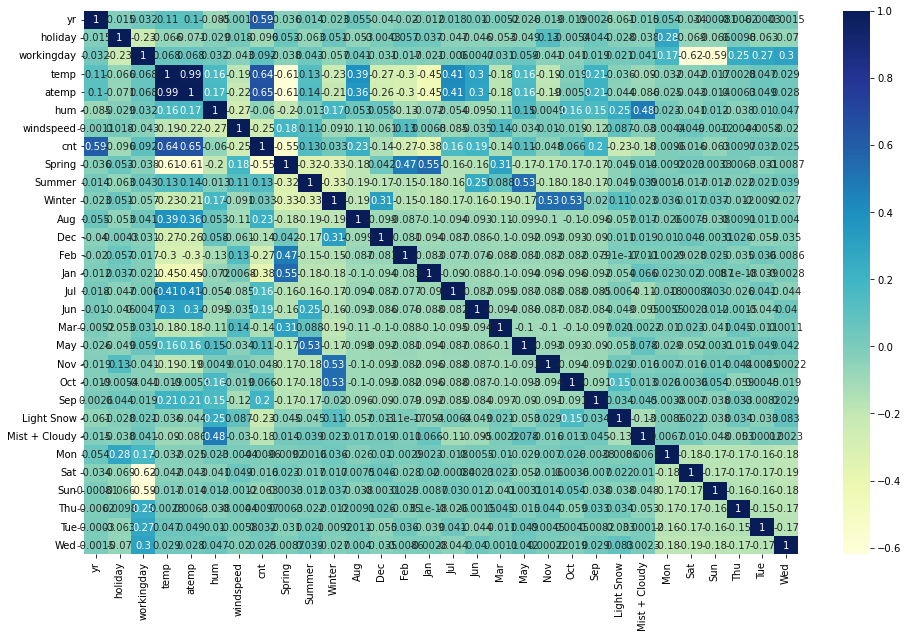

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [22]:
# Mapping Count(Target/dependent) variable to Y axis and rest of the independent variables to X axis
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Get Variables supporting RFE

In [23]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 10)           
rfe = rfe.fit(X_train, y_train)

In [24]:
# Adding all the variables supporting RFE to the model
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jan', 'Jul', 'Sep', 'Light Snow', 'Mist + Cloudy', 'Sat'],
      dtype='object')

## Step 6: Building a linear model as LR

In [25]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const            0.349290
yr               0.231691
holiday         -0.095687
temp             0.451722
hum             -0.144378
windspeed       -0.182242
Spring          -0.097203
Winter           0.056323
Dec             -0.029526
Jan             -0.046239
Jul             -0.075040
Sep              0.060302
Light Snow      -0.250964
Mist + Cloudy   -0.057245
Sat              0.018469
dtype: float64

In [26]:
# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          6.70e-188
Time:                        15:31:22   Log-Likelihood:                 508.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     495   BIC:                            -924.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3493      0.032     11.051

In [27]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.27
2,temp,16.55
4,windspeed,4.07
5,Spring,2.94
12,Mist + Cloudy,2.25
6,Winter,2.22
0,yr,2.07
8,Jan,1.73
9,Jul,1.41
7,Dec,1.35


In [29]:
# Dropping variables 'Dec' has high P value and low VIF
X_train_rfe.drop(['Dec'], 1, inplace = True)
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,Jan,Jul,Sep,Light Snow,Mist + Cloudy,Sat
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,1


### Rebuild the linear model as LR1

In [30]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.params

const            0.343096
yr               0.231598
holiday         -0.094377
temp             0.464693
hum             -0.150781
windspeed       -0.178193
Spring          -0.098478
Winter           0.052421
Jan             -0.039234
Jul             -0.077214
Sep              0.061424
Light Snow      -0.246806
Mist + Cloudy   -0.056159
Sat              0.017565
dtype: float64

In [31]:
# Print the summary of the model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          2.44e-188
Time:                        15:31:31   Log-Likelihood:                 507.15
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     496   BIC:                            -927.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3431      0.032     10.892

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif1 = pd.DataFrame()
vif1['Features'] = X_train_rfe.columns
vif1['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
3,hum,23.25
2,temp,15.95
4,windspeed,4.06
5,Spring,2.91
11,Mist + Cloudy,2.23
6,Winter,2.12
0,yr,2.07
7,Jan,1.67
8,Jul,1.41
10,Light Snow,1.21


In [33]:
# Dropping variable Sat which has high P value and low VIF
X_train_rfe.drop(['Sat'], 1, inplace = True)
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,Jan,Jul,Sep,Light Snow,Mist + Cloudy
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1


### Rebuild the linear model as LR2

In [34]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const            0.347361
yr               0.231141
holiday         -0.097329
temp             0.464398
hum             -0.153789
windspeed       -0.176940
Spring          -0.098368
Winter           0.052938
Jan             -0.038877
Jul             -0.076860
Sep              0.061767
Light Snow      -0.245554
Mist + Cloudy   -0.055578
dtype: float64

In [35]:
# Print the summary of the model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          5.52e-189
Time:                        15:31:36   Log-Likelihood:                 505.89
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3474      0.031     11.052

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif2 = pd.DataFrame()
vif2['Features'] = X_train_lm2.columns
vif2['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,Features,VIF
0,const,60.97
3,temp,3.18
6,Spring,2.72
4,hum,1.89
7,Winter,1.81
12,Mist + Cloudy,1.56
8,Jan,1.55
9,Jul,1.30
11,Light Snow,1.24
5,windspeed,1.19


In [37]:
# Dropping variable hum which has high P value and low VIF
X_train_rfe.drop(['Jan'], 1, inplace = True)
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,Jul,Sep,Light Snow,Mist + Cloudy
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1


### Rebuild the linear model as LR3

In [38]:
X_train_lm3 = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const            0.337175
yr               0.230347
holiday         -0.098066
temp             0.481631
hum             -0.158226
windspeed       -0.170113
Spring          -0.106870
Winter           0.056893
Jul             -0.080217
Sep              0.060997
Light Snow      -0.243179
Mist + Cloudy   -0.055740
dtype: float64

In [39]:
# Print the summary of the model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          3.87e-189
Time:                        15:31:48   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3372      0.031     10.805

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif3 = pd.DataFrame()
vif3['Features'] = X_train_lm3.columns
vif3['VIF'] = [variance_inflation_factor(X_train_lm3.values, i) for i in range(X_train_lm3.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,Features,VIF
0,const,59.65
3,temp,2.99
6,Spring,2.55
4,hum,1.88
7,Winter,1.77
11,Mist + Cloudy,1.56
8,Jul,1.29
10,Light Snow,1.24
5,windspeed,1.17
9,Sep,1.11


## Step 7: Residual Analysis of the train data

Text(0.5, 0, 'Errors')

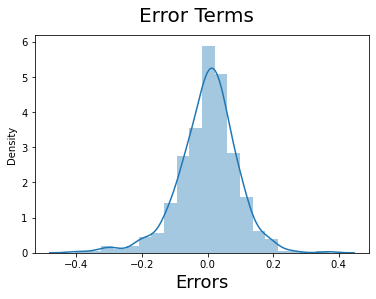

In [41]:
y_train_price = lr3.predict(X_train_lm3)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

## Step 8: Making Predictions Using the Final Model

In [42]:
# Scaling the non categorical variables to represent values between 0 and 1
num_vars1 = ['temp','windspeed', 'cnt','hum']
df_test[num_vars1] = scaler.fit_transform(df_test[num_vars1])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light Snow,Mist + Cloudy,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,24.255828,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.082192,0.086758,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.249189,8.299641,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.275286,0.282125,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,17.085500,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,24.873150,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,31.155725,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [44]:
# Retaining the columns in X_test which are used in X_train to train the linear model
X_test = X_test[X_train_rfe.columns]
X_test.head()

,yr,holiday,temp,hum,windspeed,Spring,Winter,Jul,Sep,Light Snow,Mist + Cloudy
184,0,1,0.837241,0.534223,0.149393,0,0,1,0,0,1
535,1,0,0.911423,0.470417,0.231142,0,0,0,0,0,0
299,0,0,0.496221,0.777843,0.443398,0,1,0,0,0,1
221,0,0,0.890387,0.236659,0.449707,0,0,0,0,0,0
152,0,0,0.821739,0.070765,0.682387,0,0,0,0,0,0


In [45]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)
# Making predictions using the final model
y_pred_m = lr3.predict(X_test_m)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

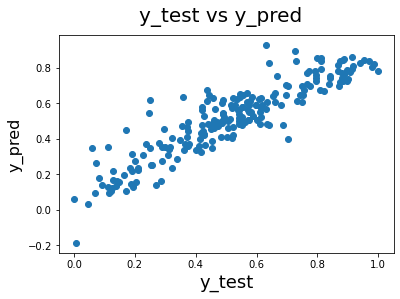

In [46]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)   

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m)

0.8144212561063003